<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [438]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [439]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

In [440]:
# let's view the first 5 rows of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [441]:
# Checking the number of rows and columns in the training data
data.shape

(10000, 14)

The dataset has 10000 rows and 14 columns

In [442]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 2 float columns (Balance and EstimatedSalary).  
There are 3 Object columns (Gender, Geography and Surname).  
Remaining 9 are integer columns (RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited)

In [443]:
# Checking the Statistical Summary
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


1. CreditScore has a mean of 650.53 and a Std Dev of 96.65. The minimum creditscore is 350 and mximum is 850.  
2. Age has a mean of 38.92 and a Std Dev of 10.49. The minimum Age is 18 and max age is 92 yrs.  
3. Tenure has a mean of 5yrs and a Std Dev 2.89. The minimum tenure is 0yrs and max tenure is 10 yrs.  
4. Balance has a mean of \\$76485.89 and a Std Dev 62397.41. The minimum balance is 0 and max balance is \\$250898.  
5. NoOfProducts has a mean of 1.53 and a Std Dev 0.58. The minimum NoOfProducts is 1 and max NoOfProducts is 4.  
6. EstimatedSalary has a mean of \\$100090.24 and a Std Dev 57510.49. The minimum EstimatedSalary is \\$11.58 and max EstimatedSalary is \\$199992.48.  
7. RowNumber, CustomerID and Surname make no sense in the bove results.  
8. HasCrCard, IsActiveMember, Exited are categorical columns  



In [444]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


There are no missing values in the dataset

In [445]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

There are no duplicate values in the dataset

In [446]:
#Checking for unique values for each of the column
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [447]:
# Unique values in each category
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


1. Exited, HasCrCard, IsActiveMember are categorical columns with 0 or 1 response.  
2. gender has only 2 values Male/Female.  
3. Geography takes 3 unique values France, Germany, Spain

In [448]:
#RowNumber , CustomerId and Surname are unique hence dropping it
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [449]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [450]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

*CreditScore*

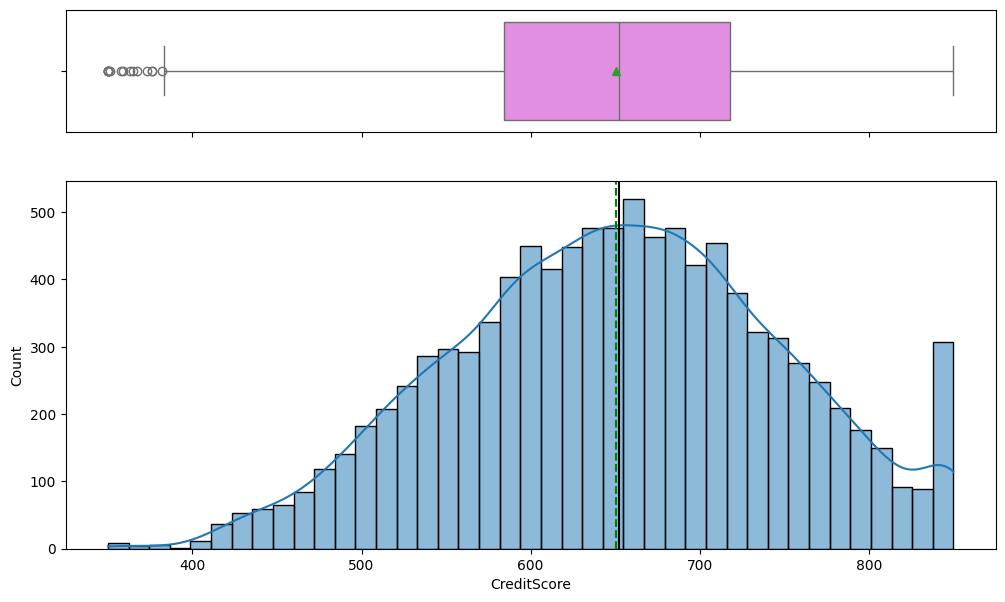

In [451]:
histogram_boxplot(data,'CreditScore')

1. The graph is mostly normal with mean and median overlapping at ~650.  
2. There is a significant number of cutomers (~300) who have the maximum credit score
3. The graph shows outliers as fewcustomers have very very low credit score around 0

*Age*

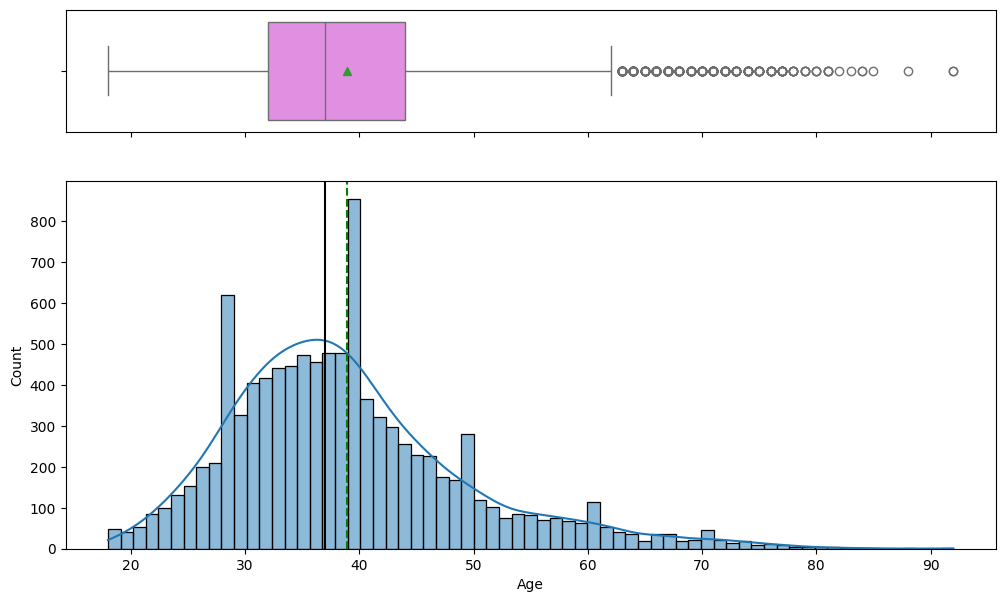

In [452]:
histogram_boxplot(data,'Age')

1. The graph is slightly right skewed
2. There are a lot of outliers as there are few customers who are 70+

*Balance*

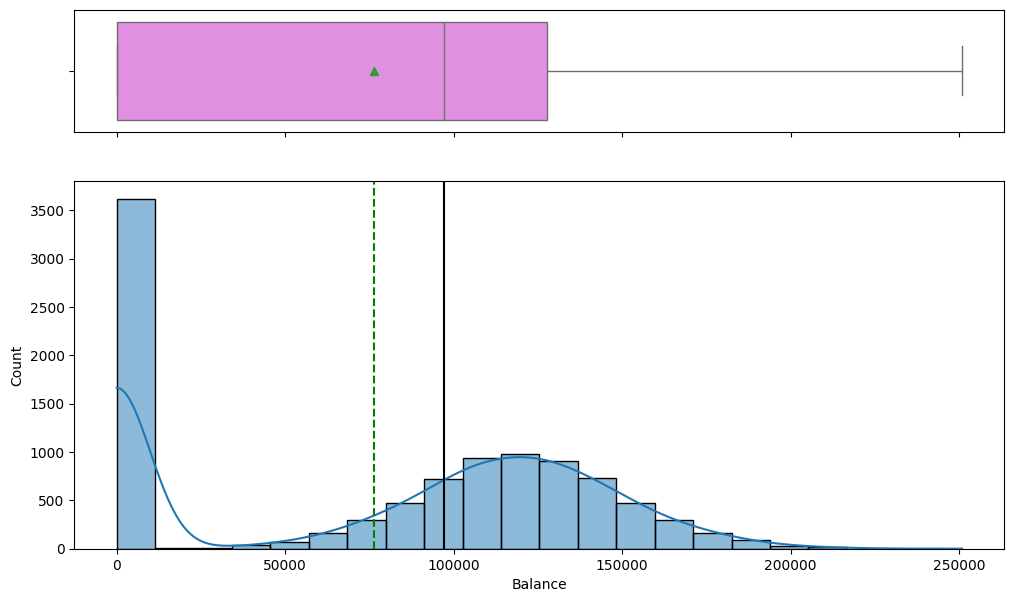

In [453]:
histogram_boxplot(data,'Balance')

1. Max number of customers have 0 balance
2. This data makes the graph highly left skewed

*EstimatedSalary*

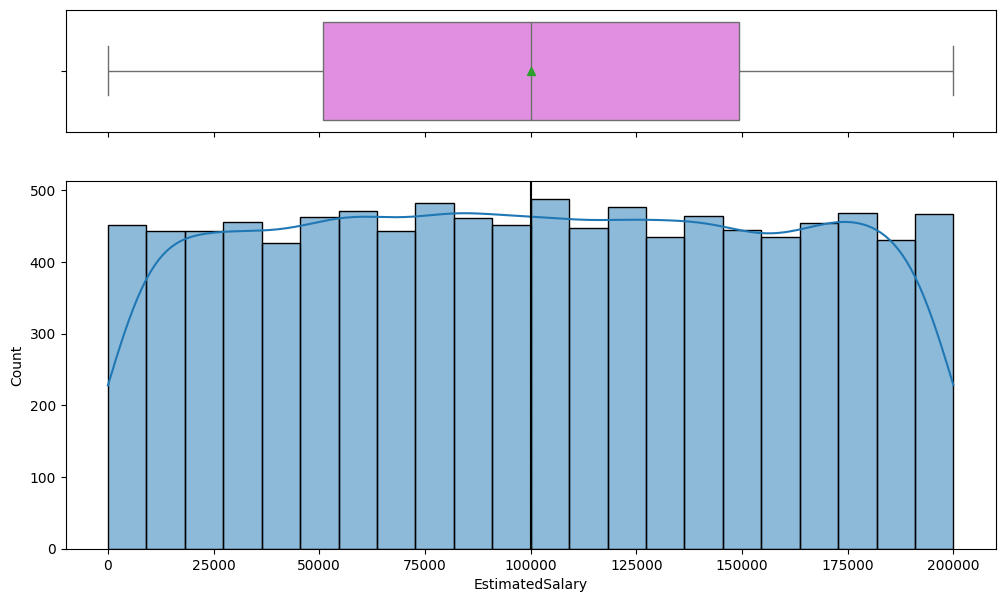

In [454]:
histogram_boxplot(data,'EstimatedSalary')

1. The graph is uniformly distributed
2. The mean and median overlap at \$100K

*Exited*

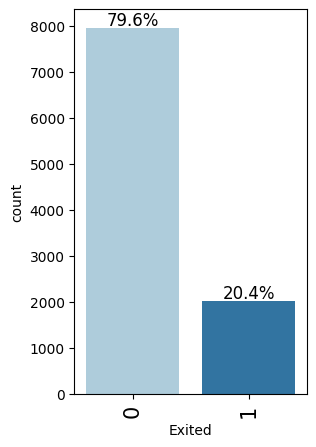

In [455]:
labeled_barplot(data, "Exited", perc=True)

1. Nearly 80% of the customers are loyal to the bank and did not churn
2. Around 20% of the customers will churn

*Geography*

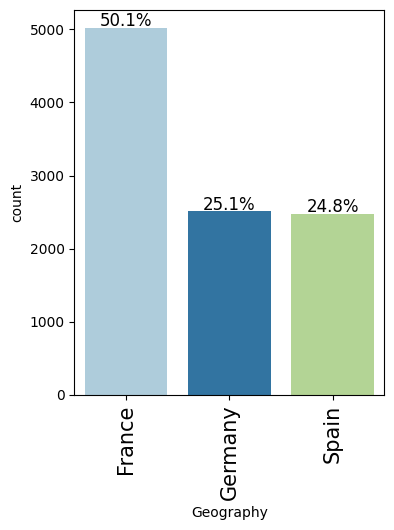

In [456]:
labeled_barplot(data, "Geography", perc=True)

1. Around 50% customers are from France
2. Germany and Spain contribute to 25% each

*Gender*

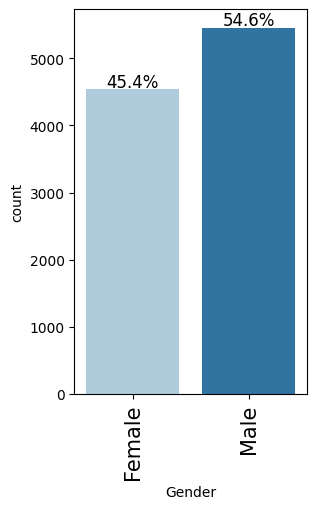

In [457]:
labeled_barplot(data, "Gender", perc=True)

1. Around 45% cutomers are females
2. Around 55% customers are males

*Tenure*

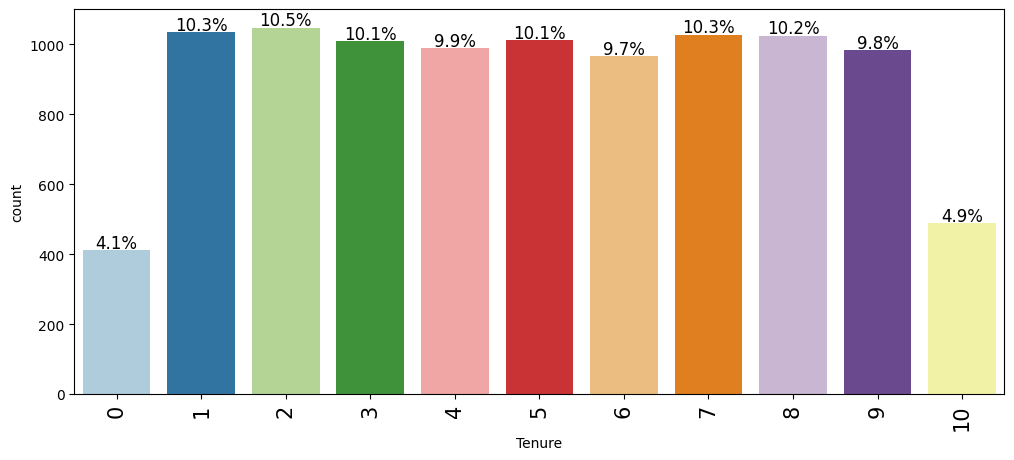

In [458]:
labeled_barplot(data, "Tenure", perc=True)

1. Around 4% of the customers have 0 tenure indicating these are new customers
2. Around 5% customers are most loyal and have been with the bank for 10 yrs
3. 9.5%-10.5% customers have been with the bank for 1 to 9 yrs

*Number of Products*

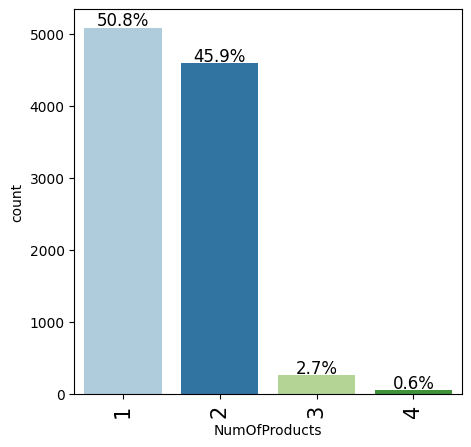

In [459]:
labeled_barplot(data, "NumOfProducts", perc=True)

1. Around 50% customers hold only 1 product
2. Around 46% of customers hold 2 products
3. Negligible amount of cutomers ~3% hold 3 or 4 products


*Has Credit Card*

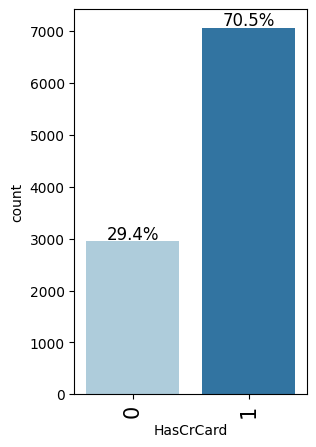

In [460]:
labeled_barplot(data, "HasCrCard", perc=True)

1. Around 70% of customers have a credit card
2. Around 30% customers do not have credit card

*Is Active Member*

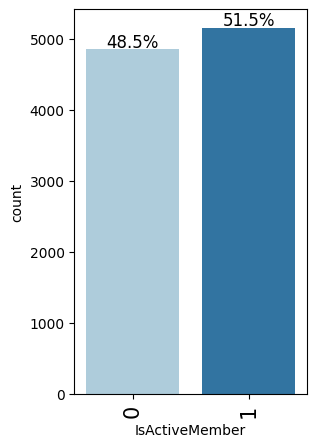

In [461]:
labeled_barplot(data, "IsActiveMember", perc=True)

Around 51% of the customers are active users of the banks products. The remaining 49% of the customers are not that active members

### Bivariate Analysis

In [462]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

*Correlation Plot*

In [463]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

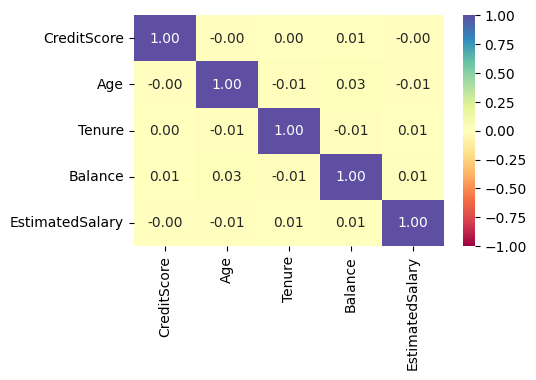

In [464]:
plt.figure(figsize=(5, 3))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

No significant correlation is seen among features

*Exited Vs Geography*

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


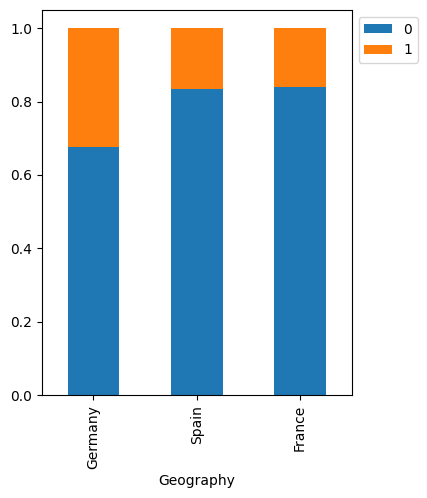

In [465]:
stacked_barplot(data, "Geography", "Exited" )

1. Out of the exited customers, 40% are German, another 40% are French and 20% are Spanish
2. Out of 2509 German customers, 32% have exited. Remaining 68% have remained loyal to the bank
3. Out of 2477 Spanish customers, 16% have exited. Remaining 84% have been loyal to the bank
4. Out of 5014 French customers, 16% have exited. 84% have remained
5. Germans seem to be most susceptible to exit

*Exited vs Gender*

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


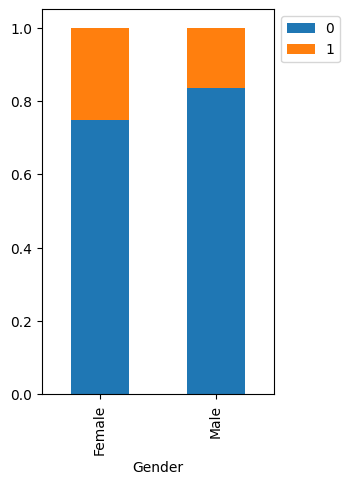

In [466]:
stacked_barplot(data, "Gender", "Exited" )

1. Out of the exited customers, 56% were females and 44% were males
2. Out of all male customers, 16% have exited whereas 84% have been loyal to the bank
3. Out of all female customers, 25% have exited whereas 75% have been loyal
4. Females seem to be exiting more tahn Males

*Exited Vs HasCrCard*

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


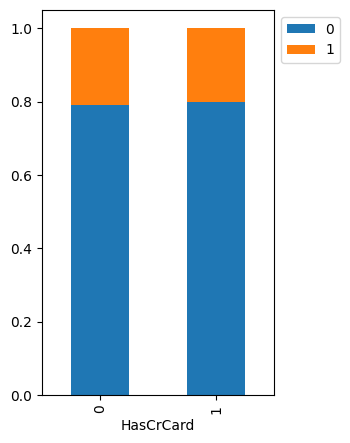

In [467]:
stacked_barplot(data, "HasCrCard", "Exited" )

1. Holding a credit card doesnt seem to impact the decision of the customer to Exit or stay
2. Out of all customers who hold a credit card, 20% have exited
3. Out of all customers who do not hold a credit card, 20% have exited

*Exited vs IsActiveMember*

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


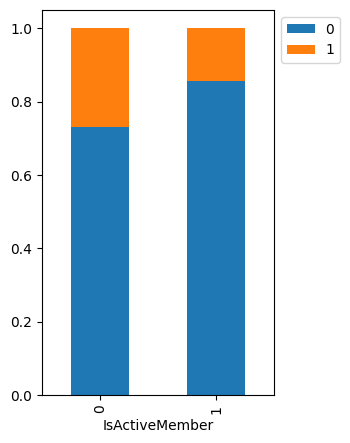

In [468]:
stacked_barplot(data, "IsActiveMember", "Exited" )

1. Inactive customers tend to exit the bank more than active customers
2. Out of all exited customers, 64% were inactive
3. Out of all customers who stayed, 55% were active members

*Exited vs Balance*

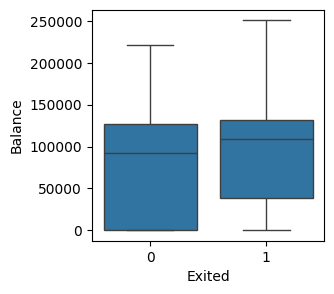

In [469]:
plt.figure(figsize=(3,3))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

Balance maintained by a customer doesnt seem to impact the decision of the customer to stay or move on.
Customers with very low balance tend to stay with the bank

*Exited vs Age*

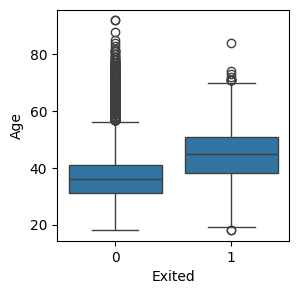

In [470]:
plt.figure(figsize=(3,3))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

1. Customers aged between 40 and 50 are more likely to leave the bank.
2. Customers aged between 30 and 40 are more likely to stay
3. Also, customers who are over 70 years old are more likely to stay.

*Exited vs Estimated Salary*

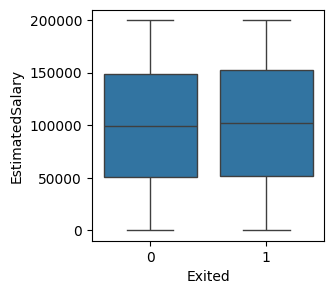

In [471]:
plt.figure(figsize=(3,3))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

Estimated Salary doesnt seem to have any impact on the decision of customers to leave or stay

*Exited vs Credit Score*

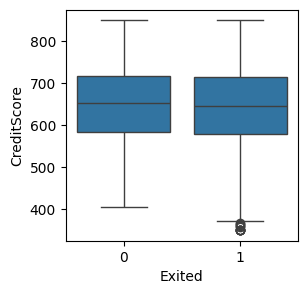

In [472]:
plt.figure(figsize=(3,3))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

Credit score doest seem to impact the customer's decision to stay or exit

*Exited vs Number Of Products*

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


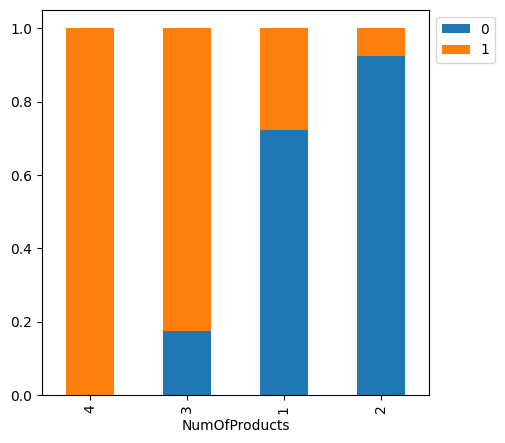

In [473]:
stacked_barplot(data, "NumOfProducts", "Exited")

1. The NumOfProducts seems to impact the decision of the customer to stay or leave
2. All customers holding 4 products at the bank seem to exit.
3. Out of customers with 3 products, 82% have exited the bank.
4. Less that 25% of customers with 1 or 2 product at the bank have chosen to exit.

## Data Preprocessing

### Dummy Variable Creation

In [474]:
data = pd.get_dummies(data,columns=data.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
data = data.astype(float)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [475]:
# Split X and y datasets
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [476]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [477]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True)

In [478]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [479]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

This is a classification problem, there is no need of scaling the target variable.

## Model Building

### Model Evaluation Criterion

Wrong predictions that the model can make :
1. Predicting a customer will close the account, but the customer doesn't close the account
2. Predicting a customer will not close the account, but the customer closes the account

Out of the two scenarios mentioned above, #2 is more important for the bank. The bank might want to minimize False Negatives. The appropriate metric to track False Negatives would be Recall.

The model that produces the maximum Recall value would be the best fit for this problem.

Once the model identifies all the customers who have a tendency to exit, the bank might introduce fruitful incentives to retain them




**Let's create a function for plotting the confusion matrix**

In [480]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [481]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [482]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [483]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
model_0.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neuron and Sigmoid as activation function
model_0.add(Dense(1, activation = 'sigmoid'))

In [484]:
#Initialize SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [485]:
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [486]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [487]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## using a batch_size of 32
    validation_data=(X_val,y_val),
    epochs=100,    ## using an epoch of 100
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6309 - recall: 0.1294 - val_loss: 0.5833 - val_recall: 0.0000e+00
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5675 - recall: 0.0033 - val_loss: 0.5465 - val_recall: 0.0000e+00
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5328 - recall: 0.0000e+00 - val_loss: 0.5257 - val_recall: 0.0000e+00
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5127 - recall: 0.0000e+00 - val_loss: 0.5132 - val_recall: 0.0000e+00
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5002 - recall: 0.0000e+00 - val_loss: 0.5051 - val_recall: 0.0000e+00
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - recall: 0.0000e+00 - val_loss: 0.4992 - val_recall: 0.0000e+00
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4857 - recall: 0.0000e+00 - val_loss: 0.4947 - val_recall: 0.0000e+00
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4809 - recall

Loss Function

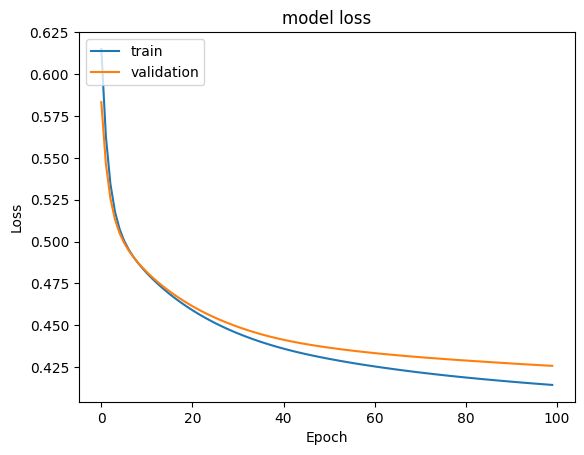

In [488]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

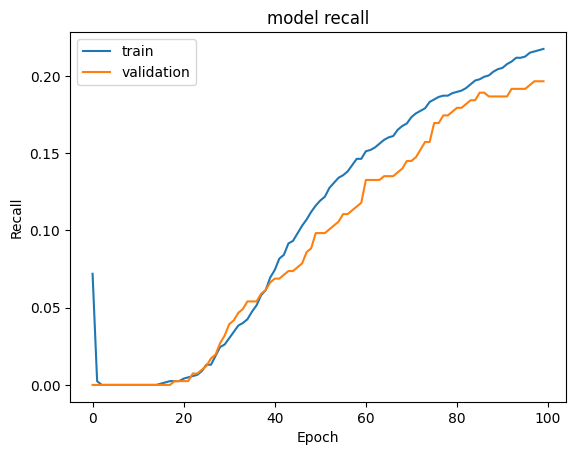

In [489]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [490]:
#Predicting the results on training dataset
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [491]:
#Predicting the results on validation dataset
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [492]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

Classification Report

In [493]:
#Classification report on training set
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      4777
         1.0       0.66      0.22      0.33      1223

    accuracy                           0.82      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.79      0.82      0.78      6000



In [494]:
#classification report on validation set
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1593
         1.0       0.61      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Confusion Matrix

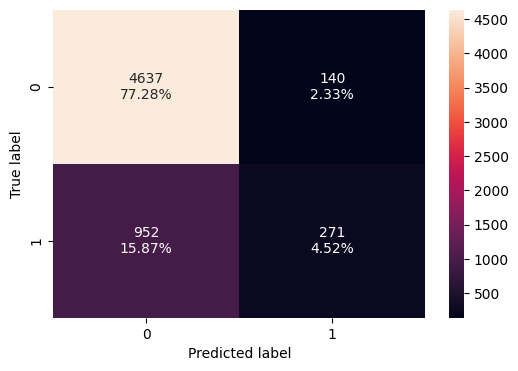

In [495]:
make_confusion_matrix(y_train, y_train_pred)

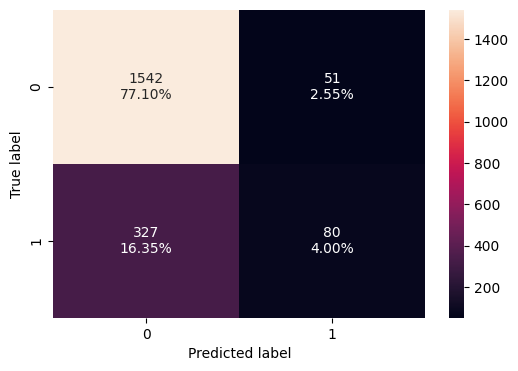

In [496]:
make_confusion_matrix(y_val, y_val_pred)

Observations on Model0

1. The model performance is very bad
2. The recall value could reach 0.22 only even after 100 epochs
3. The model accuracy curve is not smooth
4. This model has identified around 16% of false negatives in validation and training set

We will try to improve the model performance by changing the optimizer and adding dropouts

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [497]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [498]:
#Initializing the neural network
model_1 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
model_1.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neuron and Sigmoid as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [499]:
#Initialize SGD as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [500]:
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [501]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [502]:
# Fitting the ANN

history_1 = model_1.fit(
    X_train, y_train,
    batch_size=64,    ## using a batch_size of 32
    validation_data=(X_val,y_val),
    epochs=100,    ## using an epoch of 50
    verbose=1
)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5194 - recall: 0.0308 - val_loss: 0.4339 - val_recall: 0.1597
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4123 - recall: 0.1706 - val_loss: 0.4218 - val_recall: 0.2875
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3987 - recall: 0.2672 - val_loss: 0.4150 - val_recall: 0.3366
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3895 - recall: 0.3085 - val_loss: 0.4087 - val_recall: 0.3661
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3810 - recall: 0.3290 - val_loss: 0.4027 - val_recall: 0.3808
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3725 - recall: 0.3480 - val_loss: 0.3975 - val_recall: 0.3833
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3654 - recall: 0.3632 - val_loss: 0.3927 - val_recall: 0.4029
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3589 - recall: 0.3745 - val_loss: 0.3881 - val_recall: 0.4103
Epoch 9/100
94/

Loss Function

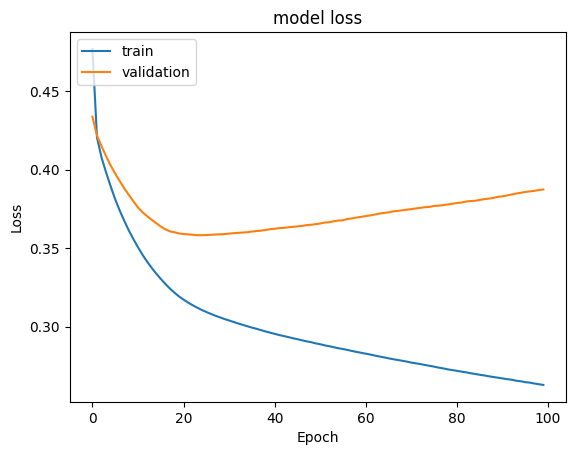

In [503]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

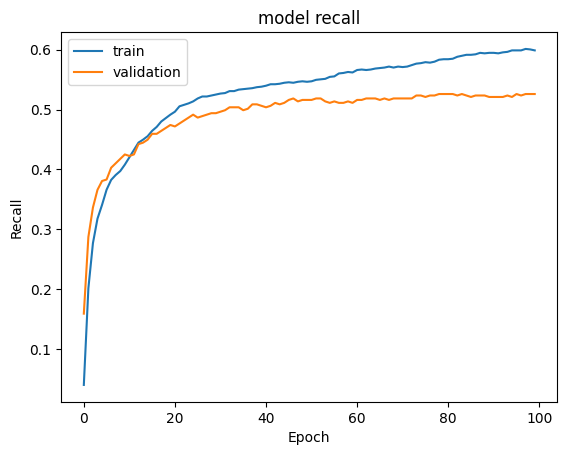

In [504]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [505]:
#Predicting the results on training dataset
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [506]:
#Predicting the results on validation dataset
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [507]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

Classification Report

In [508]:
#Classification report on training set
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      4777
         1.0       0.78      0.64      0.70      1223

    accuracy                           0.89      6000
   macro avg       0.85      0.80      0.82      6000
weighted avg       0.89      0.89      0.89      6000



In [509]:
#classification report on validation set
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1593
         1.0       0.69      0.53      0.60       407

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Confusion Matrix

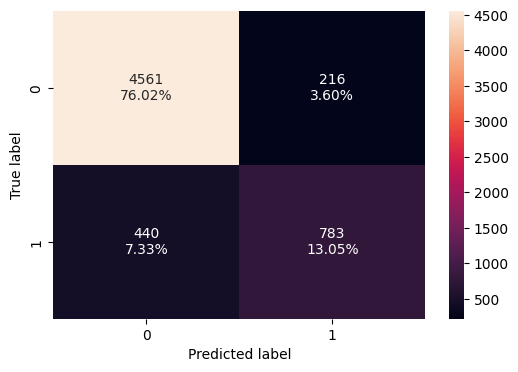

In [510]:
make_confusion_matrix(y_train, y_train_pred)

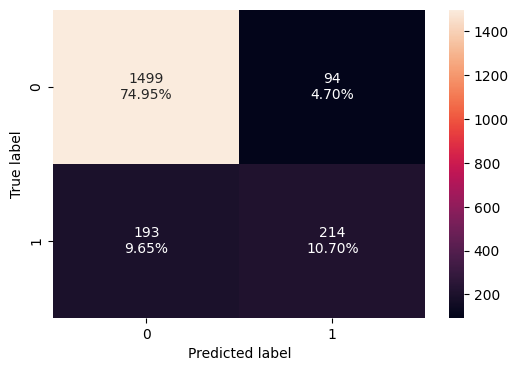

In [511]:
make_confusion_matrix(y_val, y_val_pred)

Observations on Model1

1. The model performance is better than previous model, but not very good
2. The model has a very low recall value, even after 100 epochs
3. The accuracy curve is not smooth and the model is slightly overfitting
4. This model has identified around 9% of false negatives in validation set

We will try to improve the model performance by changing the optimizer and adding dropouts

### Neural Network with Adam Optimizer and Dropout

In [512]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [513]:
#Initializing the neural network
model_2 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_2.add(Dense(32, activation='relu', input_dim = X_train.shape[1]))
# Add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Adding a hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))
# Adding a hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(24, activation='relu'))
# Add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Adding a hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(24, activation='relu'))
# Adding the output layer with 1 neuron and Sigmoid as activation function
model_2.add(Dense(1, activation = 'sigmoid'))

In [514]:
#Initialize SGD as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [515]:
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [516]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,857 (11.16 KB)

 Trainable params: 2,857 (11.16 KB)

 Non-trainable params: 0 (0.00 B)

In [517]:
# Fitting the ANN

history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,    ## using a batch_size of 32
    validation_data=(X_val,y_val),
    epochs=100,    ## using an epoch of 100
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.5728 - recall: 0.1323 - val_loss: 0.4405 - val_recall: 0.0000e+00
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4312 - recall: 6.1310e-04 - val_loss: 0.4320 - val_recall: 0.0098
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4184 - recall: 0.0838 - val_loss: 0.4230 - val_recall: 0.1425
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4159 - recall: 0.1549 - val_loss: 0.4161 - val_recall: 0.1966
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4073 - recall: 0.2194 - val_loss: 0.4071 - val_recall: 0.2998
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3963 - recall: 0.2833 - val_loss: 0.4029 - val_recall: 0.2678
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3949 - recall: 0.3021 - val_loss: 0.3977 - val_recall: 0.3096
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3901 - recall: 0.3104 - val_loss: 0.3926 - val_recall

Loss Function

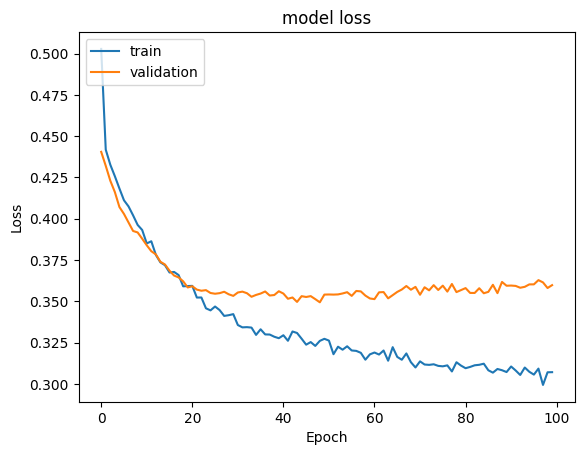

In [518]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

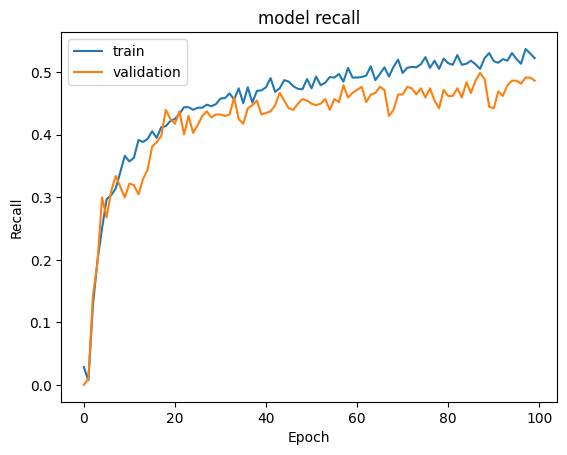

In [519]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [520]:
#Predicting the results on training dataset
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [521]:
#Predicting the results on validation dataset
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [522]:
model_name = "NN with Adam and dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

Classification Report

In [523]:
#Classification report on training set
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      4777
         1.0       0.82      0.58      0.68      1223

    accuracy                           0.89      6000
   macro avg       0.86      0.77      0.81      6000
weighted avg       0.88      0.89      0.88      6000



In [524]:
#classification report on validation set
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1593
         1.0       0.73      0.49      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Confusion Matrix

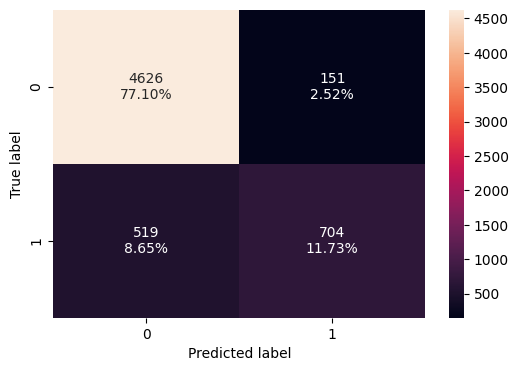

In [525]:
make_confusion_matrix(y_train, y_train_pred)

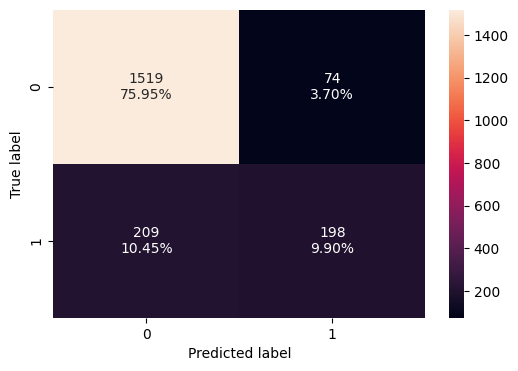

In [526]:
make_confusion_matrix(y_val, y_val_pred)

Observations on Model2

1. The model accuracy is better than previous model, but not very good
2. The recall value went down to 0.47
3. The recall curve is oscillating
4. This model has identified around 10% of false negatives in validation set

We will try to improve the model performance by changing the optimizer and adding dropouts

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [527]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



In [528]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [529]:
#Initializing the model
model_3 = Sequential()
#Adding a input layer (32 neurons and relu activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding a hidden layer (16 neurons and relu activation function)
model_3.add(Dense(16,activation='relu'))
#Adding a hidden layer (16 neurons and relu activation function)
model_3.add(Dense(16,activation='relu'))
#Adding output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [530]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [531]:
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [532]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [533]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6926 - recall: 0.4279 - val_loss: 0.6713 - val_recall: 0.3538
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6853 - recall: 0.3668 - val_loss: 0.6589 - val_recall: 0.3219
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6801 - recall: 0.3724 - val_loss: 0.6510 - val_recall: 0.3292
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6760 - recall: 0.4149 - val_loss: 0.6456 - val_recall: 0.3784
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6723 - recall: 0.4608 - val_loss: 0.6416 - val_recall: 0.4251
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6688 - recall: 0.5008 - val_loss: 0.6386 - val_recall: 0.4570
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6654 - recall: 0.5376 - val_loss: 0.6361 - val_recall: 0.4889
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6621 - recall: 0.5712 - val_loss: 0.6340 - val_recall: 0.5233


Loss Function

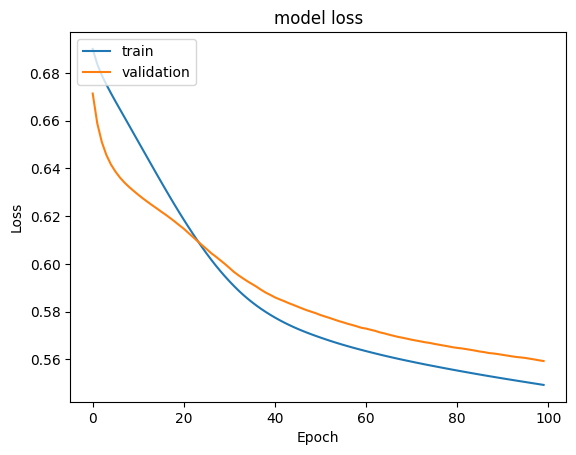

In [534]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

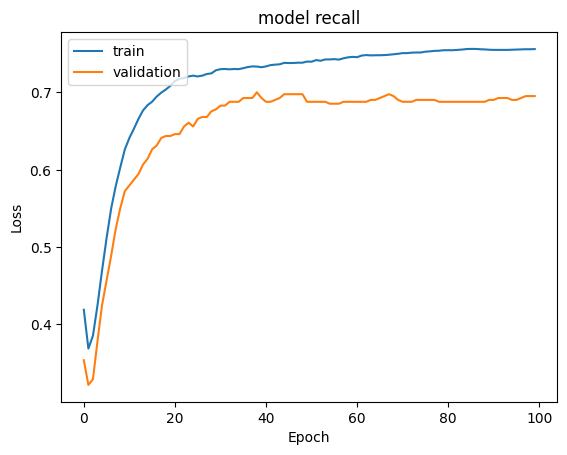

In [535]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [536]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [537]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [538]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

Classification Report

In [539]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72      4777
         1.0       0.71      0.76      0.74      4777

    accuracy                           0.73      9554
   macro avg       0.73      0.73      0.73      9554
weighted avg       0.73      0.73      0.73      9554



In [540]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      1593
         1.0       0.37      0.70      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000



Confusion Matrix

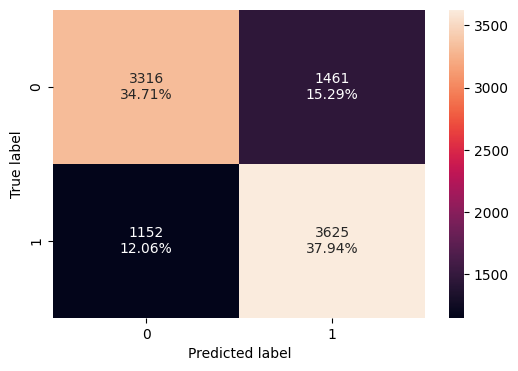

In [541]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

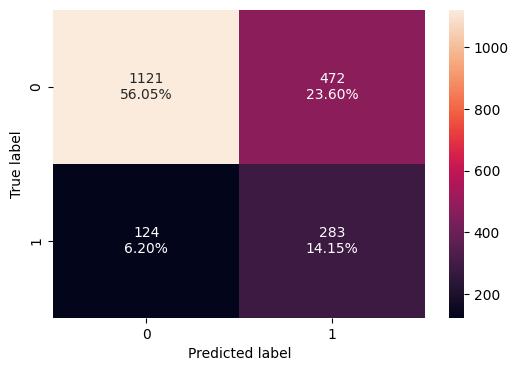

In [542]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

Observations on Model3

The model recall is much better than previous model, after balancing dataset.  
The max recall on validation set is ~0.70
The recall curve is not smooth and the model is slightly overfitting
This model has identified around 6% of false negatives in validation set

We will try to improve the model performance by changing the optimizer and adding dropouts

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [543]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [544]:
#Initializing the model
model_4 = Sequential()
#Adding a input layer (32 neurons and relu activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding a hidden layer (16 neurons and relu activation function)
model_4.add(Dense(16,activation='relu'))
#Adding a hidden layer (8 neurons and relu activation function)
model_4.add(Dense(8,activation='relu'))
#Adding output layer with a sigmoid activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [545]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [546]:
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [547]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [548]:
#Fitting the ANN
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6625 - recall: 0.7415 - val_loss: 0.5962 - val_recall: 0.7322
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5599 - recall: 0.7518 - val_loss: 0.5863 - val_recall: 0.7346
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5430 - recall: 0.7590 - val_loss: 0.5793 - val_recall: 0.7297
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5313 - recall: 0.7644 - val_loss: 0.5799 - val_recall: 0.7518
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5168 - recall: 0.7773 - val_loss: 0.5663 - val_recall: 0.7690
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4974 - recall: 0.7846 - val_loss: 0.5565 - val_recall: 0.7961
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4800 - recall: 0.7966 - val_loss: 0.5466 - val_recall: 0.8084
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4669 - recall: 0.8019 - val_loss: 0.5391 - val_recall: 0.8108
Epoch 9

Loss Function

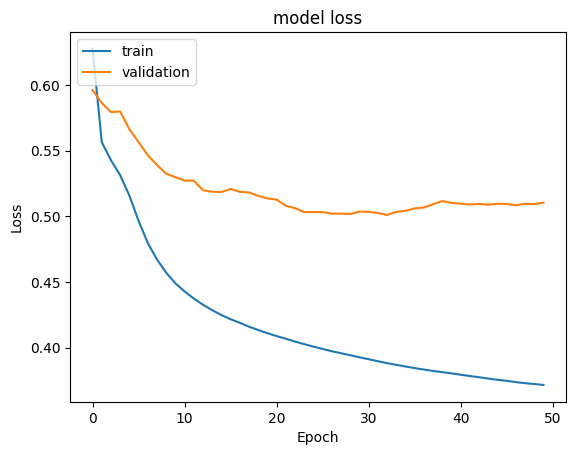

In [549]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

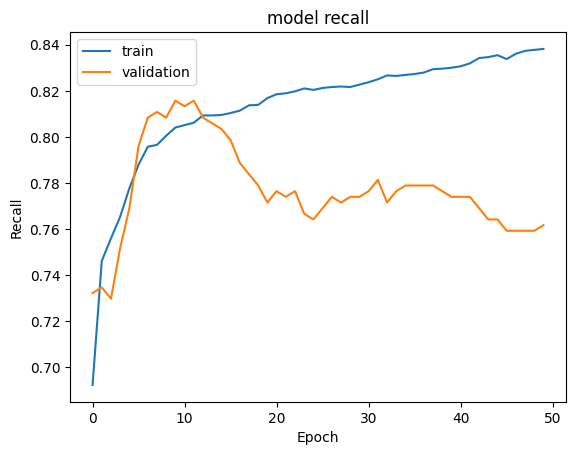

In [550]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [551]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [552]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [553]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

Classification Report

In [554]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      4777
         1.0       0.81      0.88      0.84      4777

    accuracy                           0.84      9554
   macro avg       0.84      0.84      0.84      9554
weighted avg       0.84      0.84      0.84      9554



In [555]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83      1593
         1.0       0.45      0.76      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



Confusion Matrix

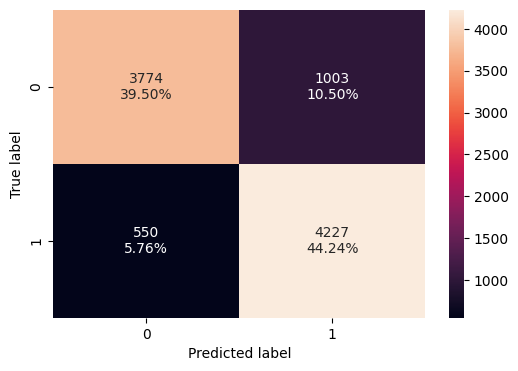

In [556]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

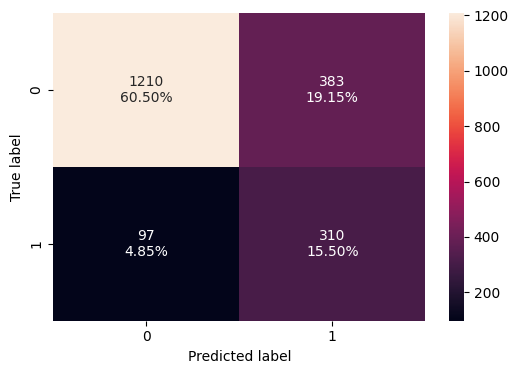

In [557]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

Observations on Model4

The model recall is much better than previous model, after balancing dataset.  
The max recall on validation set is ~0.76.  
The recall curve is not smooth and the model is clearly overfitting.  
This model has identified around 5% of false negatives in validation set

We will try to improve the model performance by adding dropouts

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [558]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [559]:
#Initializing the model
model_5 = Sequential()
#Adding a input layer (32 neurons and relu activation function)
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(BatchNormalization())
#Adding Dropout layer
model_5.add(Dropout(0.2))
#Adding a hidden layer (16 neurons and relu activation function)
model_5.add(Dense(16,activation='relu'))
model_5.add(BatchNormalization())
#Adding Dropout layer
model_5.add(Dropout(0.1))
#Adding a hidden layer (with 8 neurons and relu activation function)
model_5.add(Dense(8,activation='relu'))
# Adding output layer with a sigmoid activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [560]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [561]:
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [562]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es_cb = EarlyStopping(
    monitor = "val_recall",
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

rlop_cb = ReduceLROnPlateau(
    monitor = "val_recall",
    patience = 7,
    verbose = 1
)

callbacks = [es_cb, rlop_cb]

In [563]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,249 (4.88 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 96 (384.00 B)

In [564]:
#Fitting the ANN
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val),
    callbacks = callbacks
)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.6404 - recall: 0.6683 - val_loss: 0.5980 - val_recall: 0.6732 - learning_rate: 0.0010
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5790 - recall: 0.7172 - val_loss: 0.5509 - val_recall: 0.7027 - learning_rate: 0.0010
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5439 - recall: 0.7461 - val_loss: 0.5178 - val_recall: 0.7199 - learning_rate: 0.0010
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5222 - recall: 0.7556 - val_loss: 0.5089 - val_recall: 0.7297 - learning_rate: 0.0010
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5076 - recall: 0.7528 - val_loss: 0.4902 - val_recall: 0.7420 - learning_rate: 0.0010
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4970 - recall: 0.7548 - val_loss: 0.4845 - val_recall: 0.7543 - learning_rate: 0.0010
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4849 - recall: 0.7621 - val_loss: 0.4801 -

Loss Function

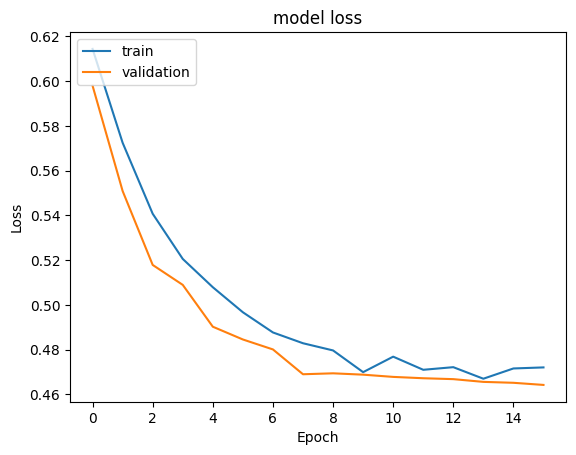

In [565]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

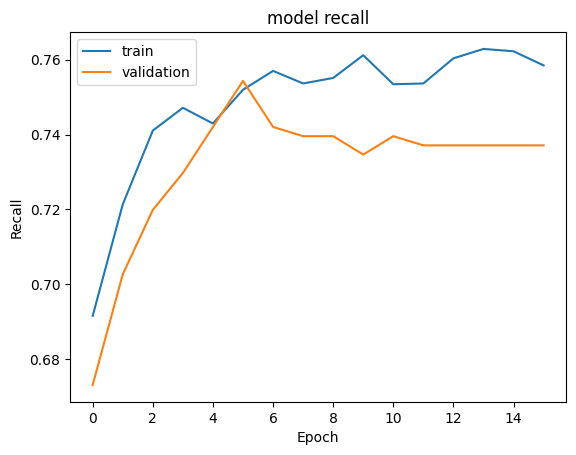

In [566]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [567]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [568]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [569]:
model_name = "NN with SMOTE & Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

Classification Report

In [570]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      4777
         1.0       0.80      0.79      0.79      4777

    accuracy                           0.79      9554
   macro avg       0.79      0.79      0.79      9554
weighted avg       0.79      0.79      0.79      9554



In [571]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1593
         1.0       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.79      2000



Confusion Matrix

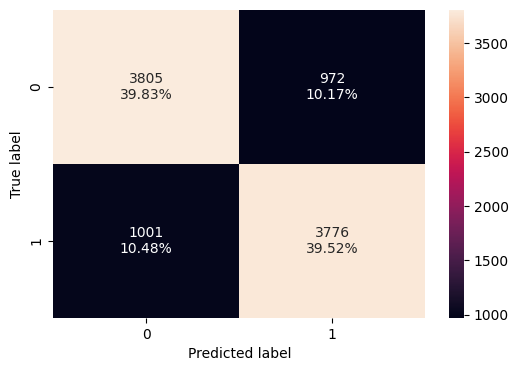

In [572]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

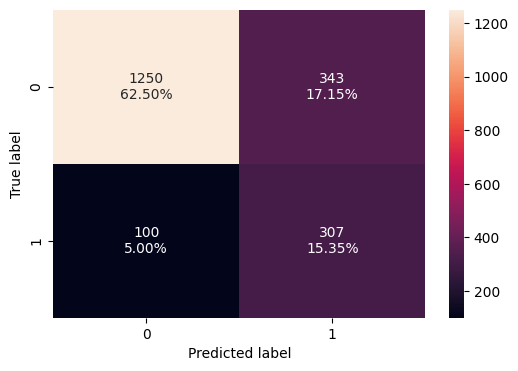

In [573]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

Observations on Model5

The model recall is much better than previous model, after balancing dataset and adding dropout layers and batch normalization layer.  
The max recall on validation set is ~0.78.  
The recall curve is not smooth and the model is not overfitting.  
This model has identified around 5% of false negatives in validation set

This seems to be the best model so far

## Model Performance Comparison and Final Model Selection

In [574]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.221586
NN with Adam,0.640229
NN with Adam and dropout,0.575634
NN with SMOTE & SGD,0.758844
NN with SMOTE & Adam,0.884865
NN with SMOTE & Adam & Dropout,0.790454


In [575]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.196560
NN with Adam,0.525799
NN with Adam and dropout,0.486486
NN with SMOTE & SGD,0.695332
NN with SMOTE & Adam,0.761671
NN with SMOTE & Adam & Dropout,0.754300


In [576]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.025026
NN with Adam,0.114430
NN with Adam and dropout,0.089147
NN with SMOTE & SGD,0.063513
NN with SMOTE & Adam,0.123194
NN with SMOTE & Adam & Dropout,0.036155


From the train and validation set metrics dataframe we see that the model 5 with adam otimizer and dropout layers have shown best performance.

Hence, our choice of model would be "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"

In [577]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [578]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1593
         1.0       0.46      0.75      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000



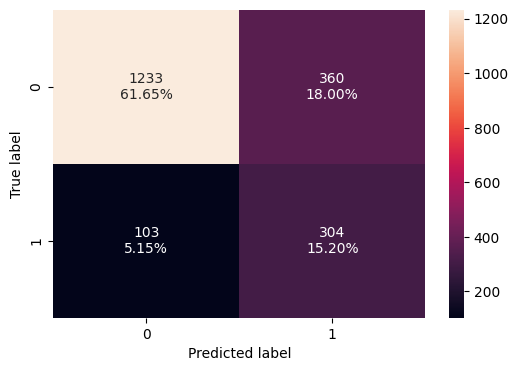

In [579]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

The model as predicted well on unseen data.  
A weighted average recall of 77% is good.   
The model is able to predict correctly more than 75% of the times.  
Our goal of minimizing False Negatives was accomplished with the model making mistake only 5% of the times.  
The other metrices like precision(83%), Accuracy(77%) and F1 Score(79%) are also good.

## Actionable Insights and Business Recommendations

1. The Bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to churn or not, and this process seems to be easier and more time-efficient than other methods.

2. The Bank can run targeted programs/offers for the customers predicted to exit. Though all the predicted churners may not exit, this activity may not be expensive for the bank.

3. The above model has a 5% of actual churners predicted as non-churners. Though this is a very small % compared to volume of customers, the bank can take the following actions to reduce the exit rate.

4. Though data from only few locations are available, German customer show a higher exit rate. The reason for this could be availability of banks with better offers or customer service. The Bank can run targeted offers for these customers to reduce the exit rate

5. Active customers tend to stick with the bank. The Bank should run offers for customers who are predicted to exit, to keep them actively in connection with the Bank

6. Middle aged customers are more prone to exit compared to young or retired customers. The Bank should run family oriented offers to keep these customers.

7. Customer holding more than 2 products at a time tend to exit the Bank. This might be due to bad customer service from the bank. Unable to manage multiple products with bad service, customers might leave. The Bank should improve customer service quality for every product it offers. Also, before approving any product for the customer, the bank should do a thorough background verification to see if the customer has the ability to pay back.

<font size=6 color='blue'>Power Ahead</font>
___